# image preprocesing(resizing,normalize,gray scale)and feature extraction(hog) 

## importing librabries

In [3]:
!pip install tqdm

import os
import cv2
import pandas as pd
import numpy as np
from skimage.feature import hog
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Parameters
image_size = (128, 128)  # Resize all images to 128x128
orientations = 9  # Number of orientation bins for HOG
pixels_per_cell = (8, 8)  # Size of the cell
cells_per_block = (2, 2)  # Number of cells per block

# Visualization helper
def visualize_images(images, titles, cols=5):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=(15, rows * 3))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
  


## Preprocessing Images

In [5]:

def preprocess_images(df):
    preprocessed_images = []
    labels = []

    for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Preprocessing images"):
        image_path = row['image_path']
        label = row['label']

        if not os.path.exists(image_path):
            print(f"Image not found: {image_path}")
            continue

        # Load the image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load image: {image_path}")
            continue

        # Resize image
        image_resized = cv2.resize(image, image_size)

        # Convert to grayscale
        gray_image = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)

        # Normalize pixel values
        normalized_image = gray_image / 255.0

        preprocessed_images.append(normalized_image)
        labels.append(label)

    # Visualize a few preprocessed images
    visualize_images(preprocessed_images[:10], labels[:10])
    
    return preprocessed_images, labels



## Extracting HOG Features

In [6]:

# 2. Extracting HOG Features
def extract_hog_features(preprocessed_images, labels):
    hog_features_list = []

    for image in tqdm(preprocessed_images, desc="Extracting HOG features"):
        # Extract HOG features
        hog_features = hog(
            image,
            orientations=orientations,
            pixels_per_cell=pixels_per_cell,
            cells_per_block=cells_per_block,
            block_norm='L2-Hys',
            visualize=False
        )
        hog_features_list.append(hog_features)

    # Visualize HOG features for the first few images
    visualize_images(preprocessed_images[:5], ["HOG Visualization"] * 5)
    
    return hog_features_list



Preprocessing images: 100%|████████████████████████████████████████████████████████| 1097/1097 [00:22<00:00, 48.75it/s]


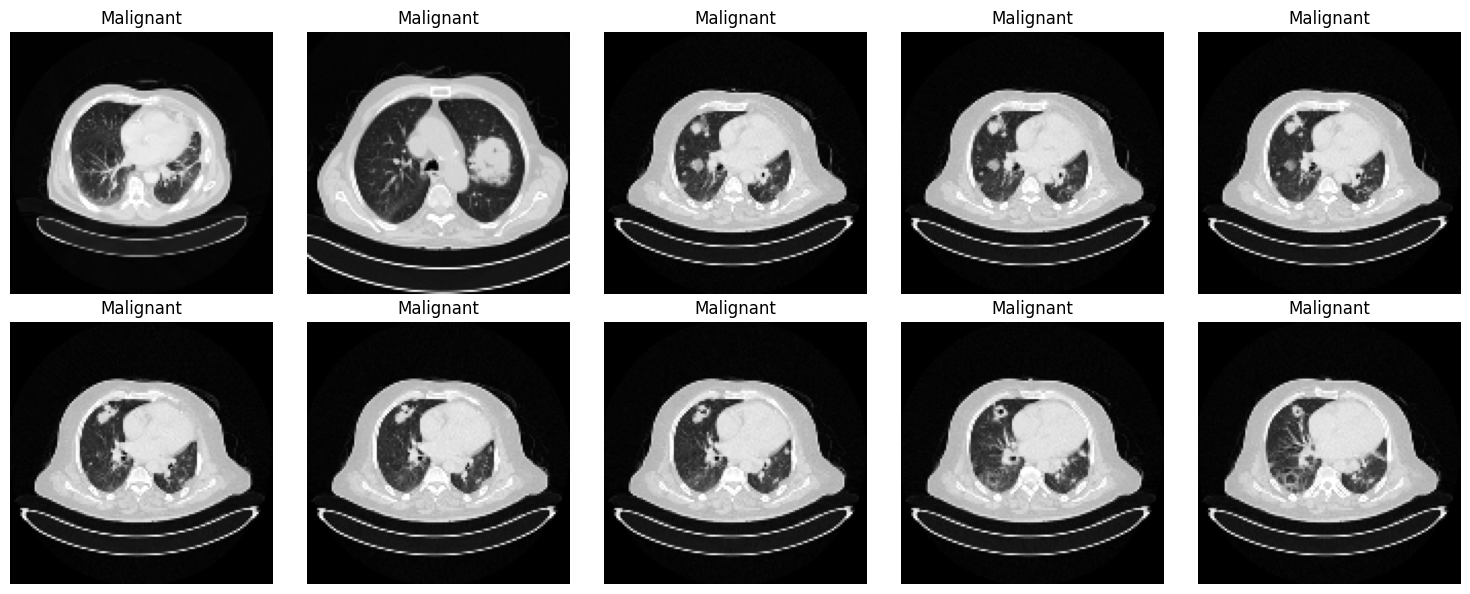

Extracting HOG features: 100%|█████████████████████████████████████████████████████| 1097/1097 [00:16<00:00, 68.17it/s]


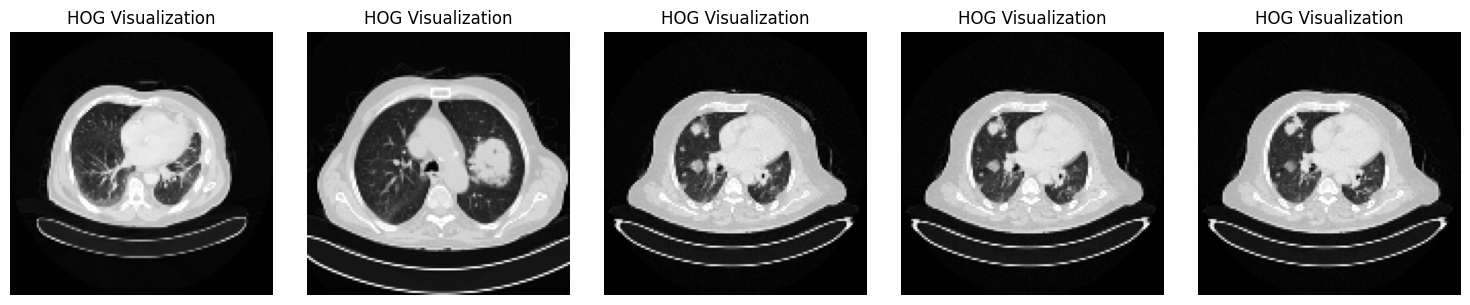

Preprocessed data saved to preprocessed_data.csv


In [7]:
# 3. Main Pipeline
def main():
    # Load the dataset
    dataset_path = 'dataset_labels.csv'  # Path to your CSV file
    df = pd.read_csv(dataset_path)
    assert 'image_path' in df.columns and 'label' in df.columns, "CSV must contain 'image_path' and 'label' columns."

    # Preprocess images
    preprocessed_images, labels = preprocess_images(df)

    # Extract HOG features
    hog_features_list = extract_hog_features(preprocessed_images, labels)

    # Combine HOG features and labels into a DataFrame
    hog_features_df = pd.DataFrame(hog_features_list)
    hog_features_df['label'] = labels

    # Save to a new CSV file
    output_csv_path = 'preprocessed_data.csv'
    hog_features_df.to_csv(output_csv_path, index=False)
    print(f"Preprocessed data saved to {output_csv_path}")

# Run the pipeline
main()


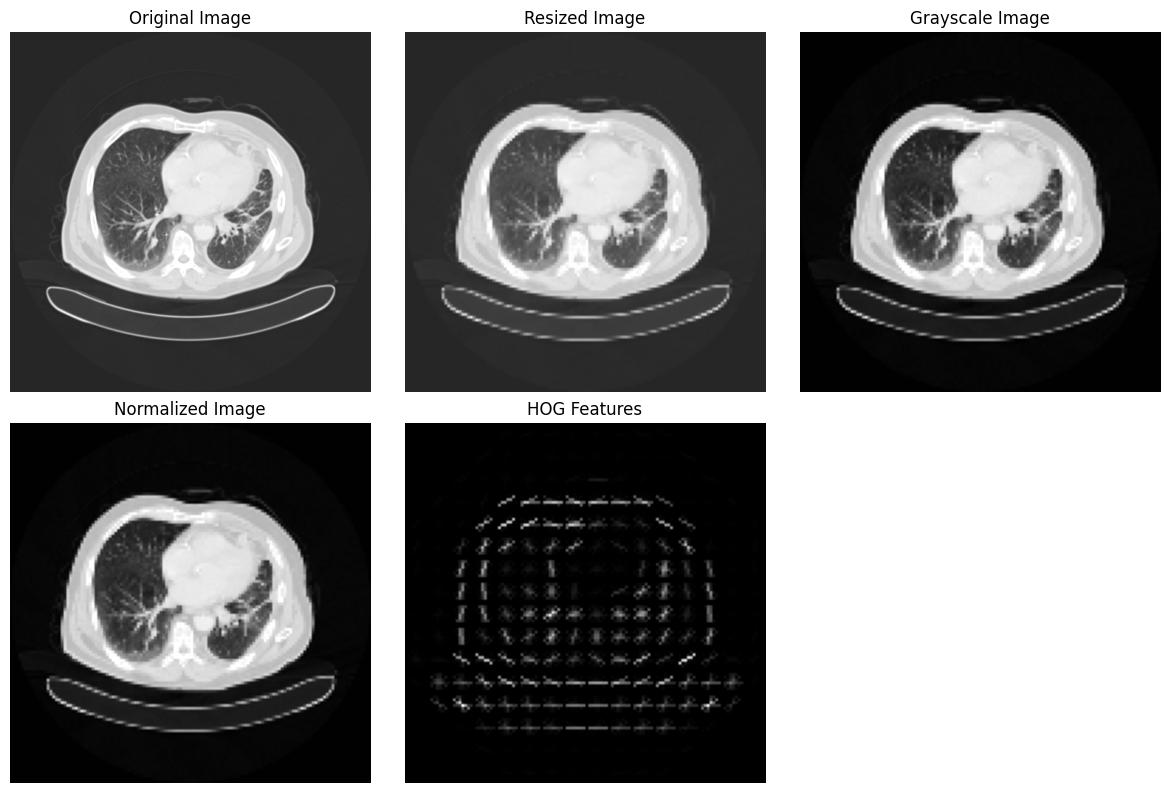

In [10]:
import os
import cv2
import pandas as pd
import numpy as np
from skimage.feature import hog
import matplotlib.pyplot as plt

# Load the preprocessed dataset
dataset_path = 'dataset_labels.csv'  # Path to your CSV file
df = pd.read_csv(dataset_path)

# Parameters for resizing and HOG
image_size = (128, 128)
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

# Visualization function
def visualize_preprocessing(image_path):
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        return
    
    # Step 1: Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image: {image_path}")
        return
    
    # Step 2: Resize image
    resized_image = cv2.resize(image, image_size)
    
    # Step 3: Convert to grayscale
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    
    # Step 4: Normalize pixel values
    normalized_image = gray_image / 255.0
    
    # Step 5: Extract HOG features
    hog_features, hog_image = hog(
        normalized_image,
        orientations=orientations,
        pixels_per_cell=pixels_per_cell,
        cells_per_block=cells_per_block,
        block_norm='L2-Hys',
        visualize=True
    )
    
    # Plot images for each step
    plt.figure(figsize=(12, 8))
    
    # Original Image
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')
    
    # Resized Image
    plt.subplot(2, 3, 2)
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.title("Resized Image")
    plt.axis('off')
    
    # Grayscale Image
    plt.subplot(2, 3, 3)
    plt.imshow(gray_image, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis('off')
    
    # Normalized Image
    plt.subplot(2, 3, 4)
    plt.imshow(normalized_image, cmap='gray')
    plt.title("Normalized Image")
    plt.axis('off')
    
    # HOG Image
    plt.subplot(2, 3, 5)
    plt.imshow(hog_image, cmap='gray')
    plt.title("HOG Features")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize the first image in the dataset
first_image_path = df['image_path'].iloc[0]
visualize_preprocessing(first_image_path)


# Splitting into train,test,validate

In [22]:
# Check the distribution of classes
print(df['label'].value_counts())


label
Malignant    561
Normal       416
Bengin       120
Name: count, dtype: int64


In [25]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the preprocessed dataset
preprocessed_data_path = 'preprocessed_data.csv'  # Replace with your preprocessed dataset path
df = pd.read_csv(preprocessed_data_path)

# Verify dataset structure
print(df.head())  # Ensure the dataset has 'image_path' and 'label' columns
print(df['label'].value_counts())  # Check class distribution

# Split dataset into Train (70%), Test (20%), and Validation (10%) while keeping classes balanced
train_data, test_data = train_test_split(
    df, test_size=0.2, stratify=df['label'], random_state=42
)
train_data, val_data = train_test_split(
    train_data, test_size=0.125, stratify=train_data['label'], random_state=42  # 0.125 * 0.8 = 10%
)

# Verify splits
print("Train distribution:\n", train_data['label'].value_counts())
print("Validation distribution:\n", val_data['label'].value_counts())
print("Test distribution:\n", test_data['label'].value_counts())

# Save the splits to CSV files
train_data.to_csv('train_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

print("Splits saved successfully!")


          0         1         2    3         4    5    6    7    8         9  \
0  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000   
1  0.032145  0.272068  0.272068  0.0  0.032145  0.0  0.0  0.0  0.0  0.272068   
2  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000   
3  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000   
4  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000   

   ...      8091      8092      8093      8094      8095      8096      8097  \
0  ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  ...  0.014019  0.006598  0.013447  0.002411  0.009166  0.001206  0.003813   
2  ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3  ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

       8098      8099      label  
0  

In [2]:
import pandas as pd

# Load the preprocessed_data.csv file
file_path = 'preprocessed_data.csv'  # Update the path if necessary
try:
    data = pd.read_csv(file_path)
    
    # Display the number of rows and columns
    print(f"Number of rows: {data.shape[0]}")
    print(f"Number of columns: {data.shape[1]}")
    
    # Display the column names
    print("\nColumn Names:")
    print(data.columns.tolist())
    
    # Show the first few rows of the dataset
    print("\nSample Data (first 5 rows):")
    print(data.head())
except FileNotFoundError:
    print(f"File '{file_path}' not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


Number of rows: 1097
Number of columns: 8101

Column Names:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149',